In [1]:
from correctingagent.world import world
from correctingagent.agents.PGMAgent import PGMCorrectingAgent, read_sentence
from correctingagent.agents.teacher import TeacherAgent, FaultyTeacherAgent
from correctingagent.world.world import RandomColoursWorld
from correctingagent.models.pgmmodels import InferenceType
from correctingagent.models.pgmmodels import *
from correctingagent.util.CPD_generation import variable_or_CPD

In [2]:
import pythonpddl.pddl

In [3]:
# The RandomColoursWorld represents a situation where we use the "colours.json" files to identify the rgp value of individual objects
# The problem directory is the full directory information starting from correctingagent/data
# The problem number is simply the number of the problem: problem5.pddl
# The domain file is assumed to be located in correctingagent/data/domain
w = RandomColoursWorld(problem_directory="fruit-4/fruit-4-1c0r-4", 
                       problem_number=5, 
                       domain_file="fruits-domain-updated.pddl")

teacher = TeacherAgent()

# 
agent = PGMCorrectingAgent(w, teacher=teacher)

# plan =[('put', ['b9', 't0']), ('put', ['b8', 'b9']), 
#        ('put', ['b7', 'b8']), ('put', ['b6', 'b7'])]
    
# for action, args in plan:
#     w.update(action, args)


# agent.get_correction("no, now you cannot put b0 in the tower because you must put green blocks on blue blocks", action, args)
# action, args = ('put', ['b0', 'b7'])
# print()
# print()
# w.update(action, args)
# agent.no_correction(action, args)



# action, args = ('put', ['b6', 'b0'])
# print()
# print()
# w.update(action, args)
# agent.no_correction(action, args)

Parsing domain /home/yucheng/Desktop/project/correcting-agent/data/domain/fruits-domain-updated.pddl
Parsing problem /home/yucheng/Desktop/project/correcting-agent/data/fruit-4/fruit-4-1c0r-4/problem5.pddl


In [7]:
import json
from skimage.color import hsv2rgb

In [8]:
json_file = "/home/yucheng/Desktop/project/correcting-agent/data/fruit-4/fruit-4-1c0r-4/colours1.json"

In [9]:
colours = json.load(open(json_file))

In [19]:
def load_data(colour_file):
    all_data = json.load(open(colour_file))
    mydata = {}
    for (obj, data) in all_data.items():
        mydata.update({obj: data[:4]}) 
    return mydata
data = load_data(json_file)
data

{'b0': [-3.739983558654785,
  2.005704402923584,
  0.9698567390441895,
  1.3633809089660645],
 'b1': [1.2112971544265747,
  -0.0682644248008728,
  -1.5374571084976196,
  1.1713473796844482],
 'b2': [0.4020228087902069,
  -0.23382242023944855,
  0.10056497156620026,
  -1.3091031312942505],
 'b3': [-0.03449419140815735,
  0.12984932959079742,
  -0.3385618329048157,
  -0.13123032450675964],
 'b4': [5.298080921173096,
  0.9436495304107666,
  0.9007065296173096,
  0.4469115436077118],
 'b5': [-1.0387004613876343,
  1.100032091140747,
  0.2446412891149521,
  0.40075406432151794],
 'b6': [-1.9145232439041138,
  -0.573814868927002,
  -0.510688304901123,
  -0.7168629765510559],
 'b7': [-2.633091926574707,
  -2.0054943561553955,
  -1.3342911005020142,
  1.9996987581253052],
 'b8': [-0.45657414197921753,
  0.09106317907571793,
  0.9304306507110596,
  -0.1505139321088791],
 'b9': [-0.8475639224052429,
  0.46786144375801086,
  1.8686623573303223,
  1.305012583732605]}

In [14]:
dict1 = {}
for (obj, data) in colours.items():
    dict1[obj] = data[:4]
dict1

{'b0': [-3.739983558654785,
  2.005704402923584,
  0.9698567390441895,
  1.3633809089660645],
 'b1': [1.2112971544265747,
  -0.0682644248008728,
  -1.5374571084976196,
  1.1713473796844482],
 'b2': [0.4020228087902069,
  -0.23382242023944855,
  0.10056497156620026,
  -1.3091031312942505],
 'b3': [-0.03449419140815735,
  0.12984932959079742,
  -0.3385618329048157,
  -0.13123032450675964],
 'b4': [5.298080921173096,
  0.9436495304107666,
  0.9007065296173096,
  0.4469115436077118],
 'b5': [-1.0387004613876343,
  1.100032091140747,
  0.2446412891149521,
  0.40075406432151794],
 'b6': [-1.9145232439041138,
  -0.573814868927002,
  -0.510688304901123,
  -0.7168629765510559],
 'b7': [-2.633091926574707,
  -2.0054943561553955,
  -1.3342911005020142,
  1.9996987581253052],
 'b8': [-0.45657414197921753,
  0.09106317907571793,
  0.9304306507110596,
  -0.1505139321088791],
 'b9': [-0.8475639224052429,
  0.46786144375801086,
  1.8686623573303223,
  1.305012583732605]}

Parsing domain /home/yucheng/Desktop/project/correcting-agent/data/domain/fruits-domain-updated.pddl
Parsing problem /home/yucheng/Desktop/project/correcting-agent/data/fruit-4/fruit-4-1c0r-4/problem5.pddl


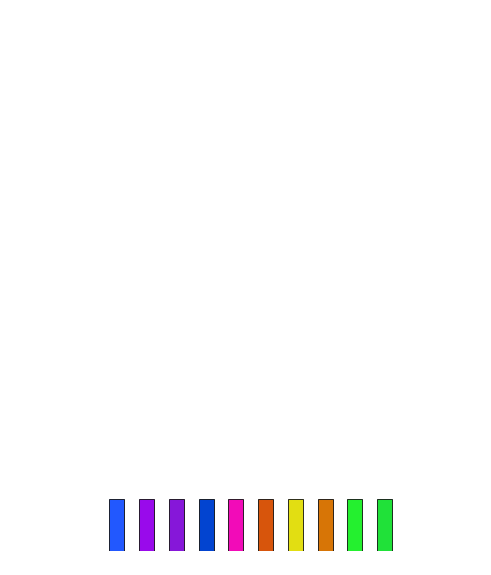

In [11]:
w.reset()

# w.update('put', ['b9', 't1', 'tower1'])
# w.update('put', ['b0', 'b1'])
w.draw()

In [19]:
# This is the basic loop for the agent solving a particular problem
w = RandomColoursWorld(problem_directory="fruit-4/fruit-4-1c0r-4", 
                       problem_number=1, 
                       domain_file="fruits-domain-updated.pddl")

teacher = TeacherAgent()

agent = PGMCorrectingAgent(w, domain_file='fruits-domain-updated.pddl', teacher=teacher, model_config={"fix_bw":True, "bw":0.05})

Parsing domain /home/yucheng/Desktop/project/correcting-agent/data/domain/fruits-domain-updated.pddl
Parsing problem /home/yucheng/Desktop/project/correcting-agent/data/fruit-4/fruit-4-1c0r-4/problem1.pddl


In [20]:
while w.test_success() is False:
    for a, args, in agent.plan():
        print(a, args)
        w.update(a, args)
        u = teacher.correction(w, a, args)
        if u != '':
            agent.get_correction(u, a, args)
            break
        else:
            agent.no_correction(a, args)

fruits-domain-updated.pddl True
planning 0.025923728942871094 time
put ['b9', 't1', 'tower1']
put ['b8', 'b9', 'tower1']
put ['b7', 'b8', 'tower1']
put ['b6', 'b7', 'tower1']
put ['b5', 'b6', 'tower1']
put ['b4', 'b5', 'tower1']
put ['b3', 'b4', 'tower1']
put ['b2', 'b3', 'tower1']
put ['b1', 'b2', 'tower1']
put ['b0', 'b1', 'tower1']
